# **This command to be used when using google colab**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# **Importing all the package**

In [11]:
import numpy as np

import os
import json
import h5py

import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import glob

from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix



%matplotlib inline

# **Loading Dataset and converting all images to 128*128**

In [3]:
def load_data(data_path, target_size=(128,128)):
    img_arr_img = []
    filelist_img = glob.glob(data_path+"*.png")
    image_paths = sorted(filelist_img)
    print(image_paths)
    for image_path in image_paths:
        try:
            image = cv2.imread(image_path)
            image = cv2.resize(image, dsize=target_size)
            img_arr_img.append(image)
        except (RuntimeError, TypeError,NameError) as e:
            print(e)
            pass
    return np.asarray(img_arr_img), image_paths


# **Calling the load function**

In [7]:
path_infected = '/content/gdrive/My Drive/cell images/Parasitized/'
path_uninfected = '/content/gdrive/My Drive/cell images/Uninfected/'

X_infected, filenames_infected = load_data(path_infected)
X_uninfected, filenames_uninfected = load_data(path_uninfected)

['/content/gdrive/My Drive/cell images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png', '/content/gdrive/My Drive/cell images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png', '/content/gdrive/My Drive/cell images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png', '/content/gdrive/My Drive/cell images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png', '/content/gdrive/My Drive/cell images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png', '/content/gdrive/My Drive/cell images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png', '/content/gdrive/My Drive/cell images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png', '/content/gdrive/My Drive/cell images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_169.png', '/content/gdrive/My Drive/cell images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_170.png', '/content/gdrive/My Drive/cell images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_171.png', '/content/gdrive/My

# **Create Train and Test Split as well as label for each image**

In [18]:
X = np.vstack((X_uninfected, X_infected))
labels = [0]*X_uninfected.shape[0] + [1]*X_infected.shape[0]

# We need to separate the data into train and test arrays 
X_train, X_test, y_train, y_test = train_test_split(X,labels,test_size=0.1,random_state=42)
print(len(X_train),len(X_test),len(y_train),len(y_test))

24802 2756 24802 2756


# **Plot the Images**

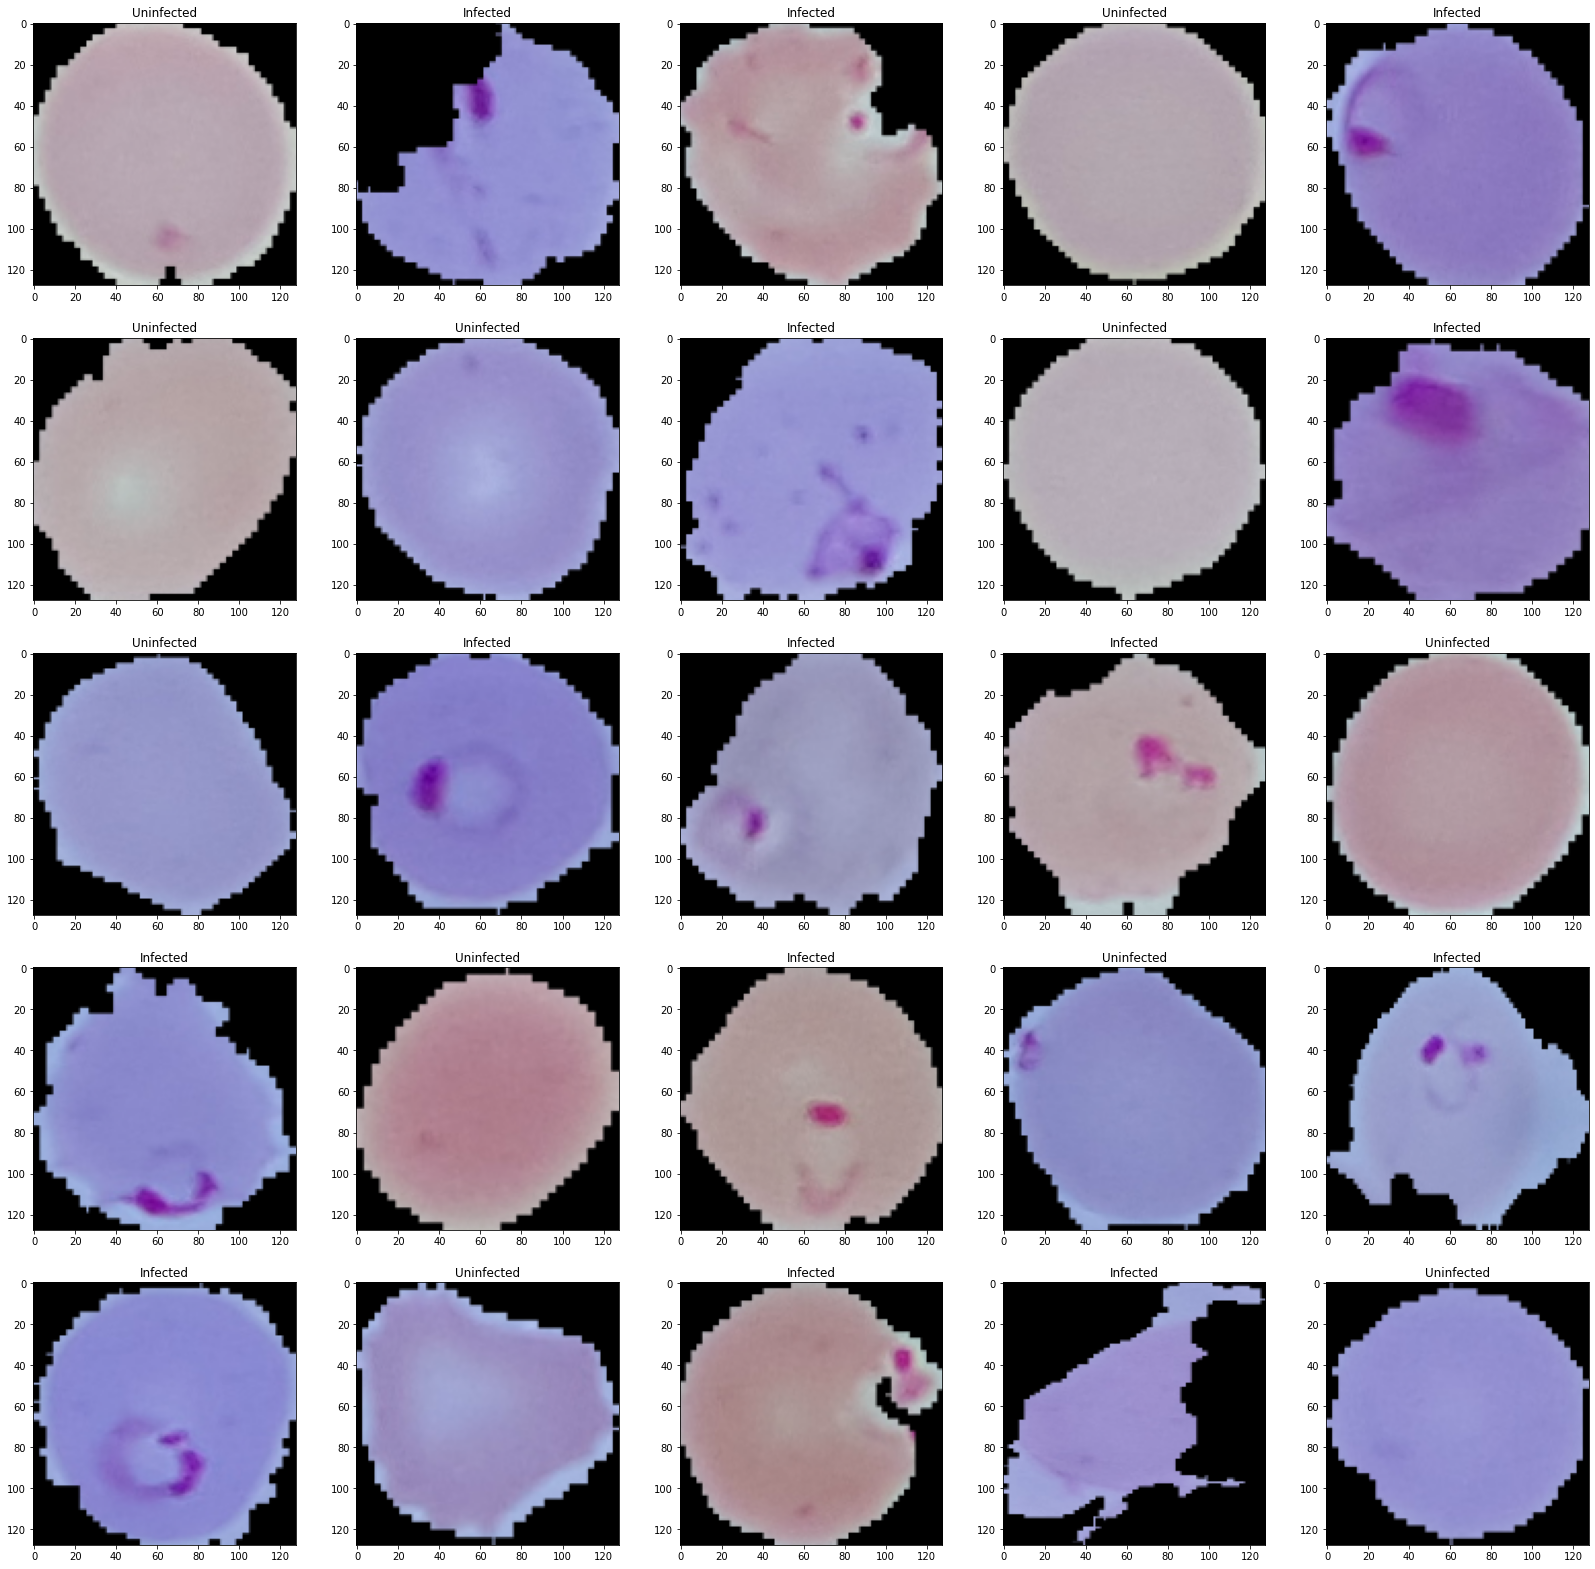

In [10]:
fig=plt.figure(figsize=(28, 28))
columns = 2
rows = 2
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i])
    if y_train[i] == 0:
        plt.title('Uninfected')
    else:
        plt.title('Infected')
    
plt.show()

# **CNN Model**

In [19]:
K.set_image_data_format('channels_last')
np.random.seed(0)

def CNN(input_shape, with_summary):
    model = Sequential()
    model.add(Conv2D(10, kernel_size=5, padding="same", input_shape=input_shape, activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(20, kernel_size=3, padding="same", activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(30, kernel_size=3, padding="same", activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=30, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(units=5, activation='relu'))
    #model.add(Dropout(0.1))

    model.add(Dense(1))
    model.add(Activation("sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    if with_summary:
        model.summary()

    return model

def save_history(hist, filepath):
    with open(filepath, 'w') as f:
        json.dump(hist.history, f)

def plot_loss(history_filepath):
    with open(history_filepath) as json_data:
        history = json.load(json_data)
    print(history.keys())
    plt.plot(history['loss'])
    plt.plot(history['acc'])
    plt.title('Training metrics')
    plt.xlabel('epoch')
    plt.legend(['loss', 'accuracy'], loc='upper left')
    plt.show()

In [20]:
input_shape = (128, 128, 3)
model = CNN(input_shape=input_shape, with_summary=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 10)      760       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 10)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 20)        1820      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 30)        5430      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 30)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7680)             

In [21]:
hist = model.fit(np.array(X_train),np.array(y_train),batch_size=64,epochs=10)

Epoch 1/10
388/388 [==============================] - 399s 1s/step - loss: 0.7238 - accuracy: 0.5033
Epoch 2/10
388/388 [==============================] - 396s 1s/step - loss: 0.6929 - accuracy: 0.5081
Epoch 3/10
388/388 [==============================] - 396s 1s/step - loss: 0.6795 - accuracy: 0.5833
Epoch 4/10
388/388 [==============================] - 398s 1s/step - loss: 0.6586 - accuracy: 0.6263
Epoch 5/10
388/388 [==============================] - 398s 1s/step - loss: 0.6400 - accuracy: 0.6516
Epoch 6/10
388/388 [==============================] - 398s 1s/step - loss: 0.6242 - accuracy: 0.6653
Epoch 7/10
388/388 [==============================] - 399s 1s/step - loss: 0.5894 - accuracy: 0.6985
Epoch 8/10
388/388 [==============================] - 399s 1s/step - loss: 0.3044 - accuracy: 0.9238
Epoch 9/10
388/388 [==============================] - 399s 1s/step - loss: 0.2233 - accuracy: 0.9483
Epoch 10/10
388/388 [==============================] - 400s 1s/step - loss: 0.1811 - accura

In [22]:
model.evaluate(np.array(X_test),np.array(y_test))

87/87 [==============================] - 20s 228ms/step - loss: 0.1920 - accuracy: 0.9456


[0.1920412927865982, 0.9455732703208923]

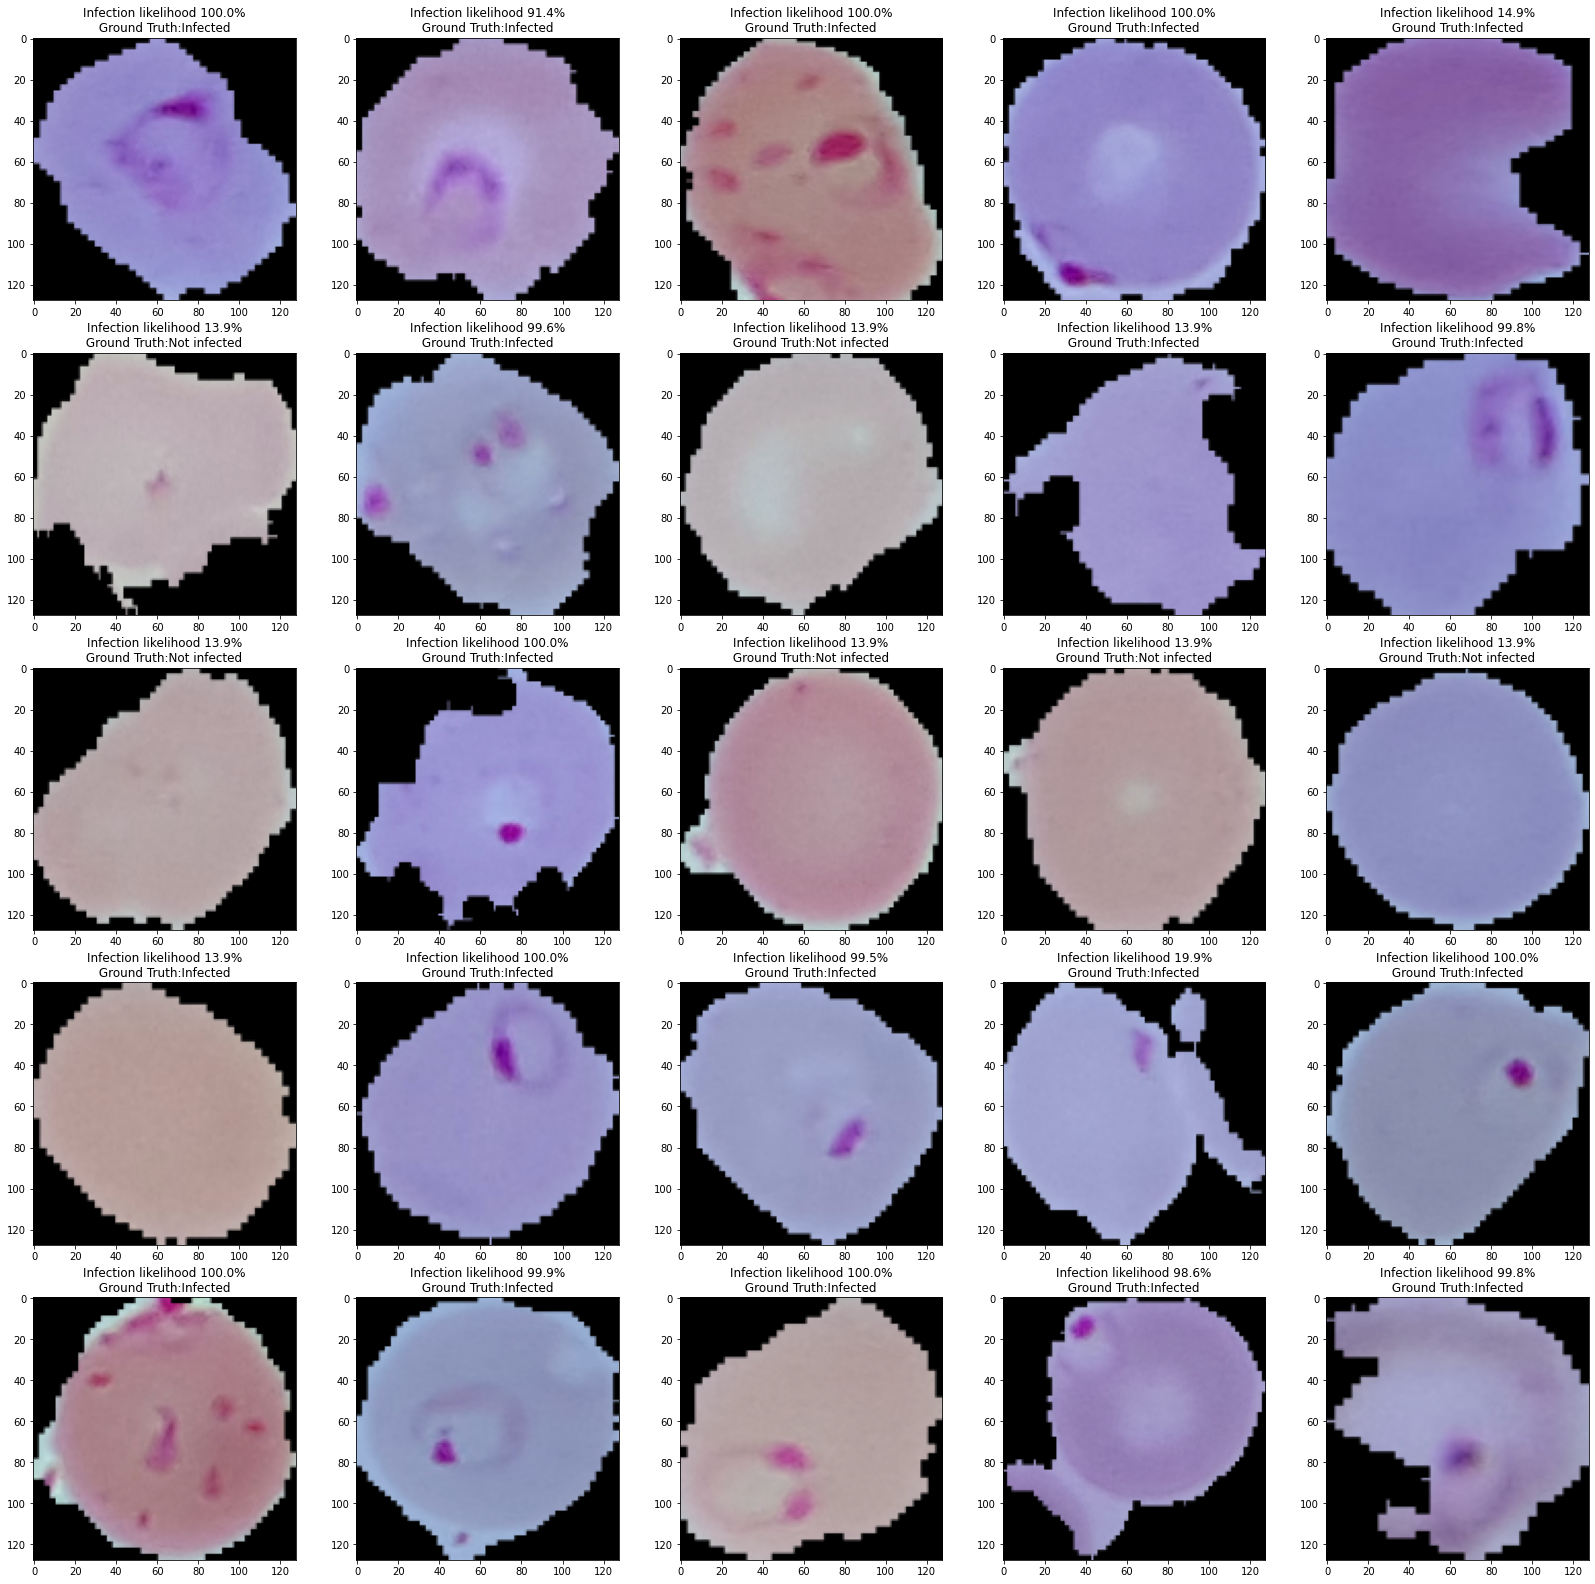

In [23]:
predictions = model.predict(X_test)

fig=plt.figure(figsize=(28, 28))
columns = 5
rows = 5
random_number = np.random.randint(0,X_test.shape[0]-26)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_test[i+random_number])
    gt = ['Not infected', 'Infected']
    plt.title('Infection likelihood {:.1%}\n Ground Truth:{} '.format(float(predictions[i+random_number]), gt[y_test[i+random_number]]))
    
plt.show()


In [26]:
threshold = 0.65
predictions_final = [int(pred>threshold) for pred in predictions]

print(classification_report(y_test, predictions_final))


              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1407
           1       0.98      0.89      0.94      1349

    accuracy                           0.94      2756
   macro avg       0.94      0.94      0.94      2756
weighted avg       0.94      0.94      0.94      2756



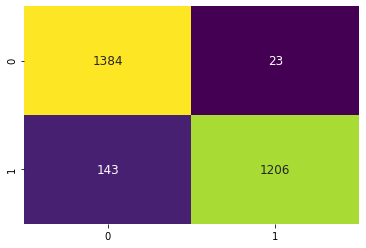

In [27]:
def draw_confusion_matrix(true,preds):
    conf_matx = confusion_matrix(true, preds)
    sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap="viridis")
    plt.show()

draw_confusion_matrix(y_test, predictions_final)
